In [3]:
# Google Drive'ı bağlayın
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Gerekli kütüphaneleri kurun
!pip install roboflow

# Gerekli kütüphaneleri import edin
from roboflow import Roboflow
import os

# Roboflow API'sini kullanarak veri setini indir
rf = Roboflow(api_key="dKSkYtRIx4GI9l9vZ8BK")
project = rf.workspace("image-process-xjp0f").project("inbreast-dataset-emiuj")
version = project.version(2)

# Veri setini doğrudan hedef dizine indir
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to INbreast-Dataset-2 in yolov8:: 100%|██████████| 224/224 [00:00<00:00, 9086.83it/s]


In [3]:
!pip install ultralytics==8.0.196

  Using cached ultralytics-8.0.196-py3-none-any.whl.metadata (31 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Us

In [9]:
import os
import shutil

# Kaynak ve hedef dizinleri belirleyin
source_directory = "/content/INbreast-Dataset-2"
target_directory = "/content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO"

# Hedef dizin yoksa oluştur
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Kaynak dizindeki dosyaları hedef dizine taşı
for filename in os.listdir(source_directory):
    source_file = os.path.join(source_directory, filename)
    target_file = os.path.join(target_directory, filename)

    # Dosyayı taşı
    shutil.move(source_file, target_file)

print(f"Files moved from {source_directory} to {target_directory}")

# Hedef dizindeki dosyaları listeleyin ve kontrol edin
def list_files_in_directory(path):
    try:
        # Dosya ve klasörleri listele
        files_and_folders = os.listdir(path)
        print(f"{path} dizinindeki dosyalar ve klasörler:")
        for item in files_and_folders:
            print(item)
    except FileNotFoundError:
        print(f"{path} dizini bulunamadı.")
    except PermissionError:
        print(f"{path} dizinine erişim izni yok.")
    except Exception as e:
        print(f"Bir hata oluştu: {e}")

# Fonksiyonu çağırın
list_files_in_directory(target_directory)


Files moved from /content/INbreast-Dataset-2 to /content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO
/content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO dizinindeki dosyalar ve klasörler:
.ipynb_checkpoints
inbreast_yolov8.ipynb
README.dataset.txt
valid
test
data.yaml
README.roboflow.txt
train


In [10]:
# Adım 1: YOLOv8 kütüphanesini kurun
!pip install ultralytics

# Gerekli kütüphaneleri import edin
from ultralytics import YOLO

# Adım 2: YOLOv8 modelini eğitin
model = YOLO('yolov8n.yaml')  # YOLOv8n modelini özel bir YAML dosyasıyla yükleyin
results = model.train(data='/content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/data.yaml', epochs=50)  # Modeli eğitin



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [12]:
# Model performansını doğrulayın
validation_results = model.val()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]
                   all          6          6      0.401      0.335      0.546      0.252
                Mass_1          6          6      0.401      0.335      0.546      0.252
Speed: 1.1ms preprocess, 6.7ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d7f366c6a0>
fitness: 0.2817287790396958
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.25232,     0.25232,     0.25232])
names: {0: 'Mass_1', 1: 'Mass_2', 2: 'Mass_3'}
plot: True
results_dict: {'metrics/precision(B)': 0.40111862013319755, 'metrics/recall(B)': 0.33519770022199585, 'metrics/mAP50(B)': 0.5463790315400989, 'metrics/mAP50-95(B)': 0.25232319542853987, 'fitness': 0.2817287790396958}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 1.054247220357259, 'inference': 6.7187150319417315, 'loss': 0.0045299530029296875, 'postprocess': 2.8624931971232095}


In [13]:
import shutil

# Kaynak ve hedef dizinleri belirleyin
source_directory = '/content/runs'
target_directory = '/content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/runs'

# Hedef dizin yoksa oluştur
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# runs klasörünü Google Drive'a taşı
shutil.move(source_directory, target_directory)

print(f"runs klasörü {target_directory} dizinine taşındı.")


runs klasörü /content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/runs dizinine taşındı.


In [14]:
# Kaynak ve hedef dosya yollarını belirleyin
source_file = '/content/yolov8n.pt'
target_file = '/content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/yolov8n.pt'

# yolov8n.pt dosyasını Google Drive'a taşı
shutil.move(source_file, target_file)

print(f"yolov8n.pt dosyası {target_file} dizinine taşındı.")


yolov8n.pt dosyası /content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/yolov8n.pt dizinine taşındı.


In [13]:
from google.colab import files
import os
import shutil

# Dosya yükleme
uploaded = files.upload()

# Hedef dizini belirleyin
target_directory = '/content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/predict_image'

# Hedef dizin yoksa oluştur
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Yüklenen dosyayı hedef dizine taşı
for filename in uploaded.keys():
    source_path = filename
    target_path = os.path.join(target_directory, filename)
    shutil.move(source_path, target_path)
    print(f"Dosya {target_path} dizinine yüklendi.")


Saving mamografi-scaled.jpg to mamografi-scaled.jpg
Dosya /content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/predict_image/mamografi-scaled.jpg dizinine yüklendi.



image 1/1 /content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/predict_image/Dig.-Mamografi4.jpg: 480x640 (no detections), 190.0ms
Speed: 7.2ms preprocess, 190.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


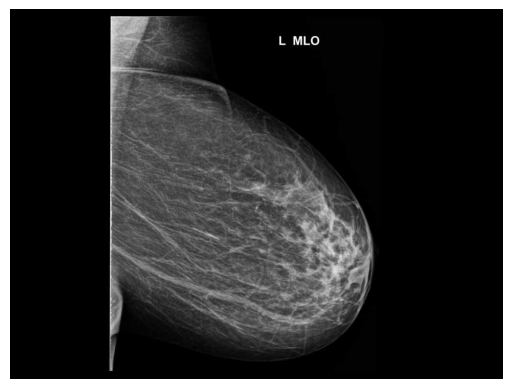


image 1/1 /content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/predict_image/mamografi-scaled.jpg: 640x512 1 Mass_1, 189.8ms
Speed: 3.9ms preprocess, 189.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


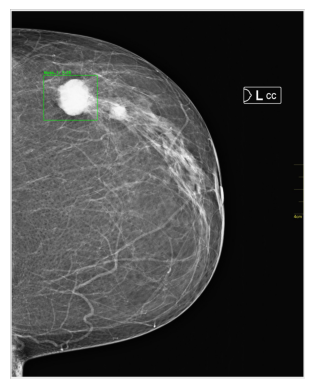

In [14]:
import matplotlib.pyplot as plt
import cv2
import os
from ultralytics import YOLO

# Eğitilmiş model dosyasını yükleyin
model = YOLO('/content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/runs/detect/train/weights/best.pt')

# Predict_image klasöründeki tüm görüntüleri alın
predict_image_directory = '/content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/predict_image'
image_paths = [os.path.join(predict_image_directory, img) for img in os.listdir(predict_image_directory) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Her bir görüntü için tahmin ve görselleştirme işlemleri
for image_path in image_paths:
    results = model(image_path)

    for result in results:
        img = result.orig_img  # Orijinal görüntüyü alın
        boxes = result.boxes  # Tespit edilen kutular

        if boxes is not None:  # Eğer kutular varsa
            for box in boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Kutunun köşe koordinatlarını alın
                confidence = box.conf[0]  # Güven skoru
                class_id = box.cls[0]  # Sınıf kimliği
                label = f'{model.names[int(class_id)]}: {confidence:.2f}'  # Etiket

                # Kutuyu ve etiketi görüntüye çiz
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Görüntüyü göster
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()



0: 640x640 (no detections), 197.5ms
Speed: 5.7ms preprocess, 197.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


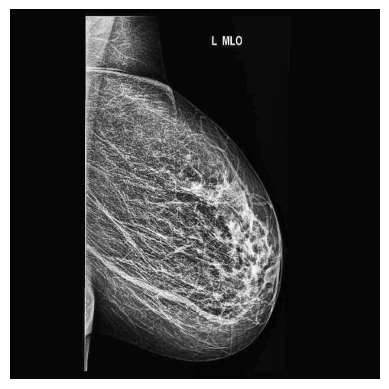


0: 640x640 (no detections), 222.8ms
Speed: 2.9ms preprocess, 222.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


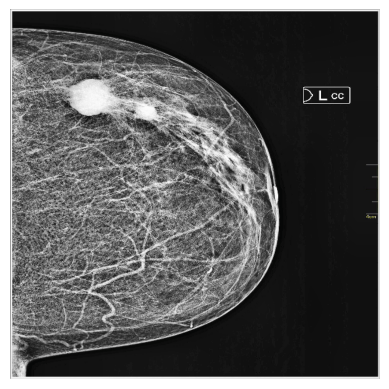

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

# Eğitilmiş model dosyasını yükleyin
model = YOLO('/content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/runs/detect/train/weights/best.pt')

# Görüntü keskinleştirme fonksiyonu
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

# Görüntü kontrast artırma fonksiyonu
def increase_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    enhanced_image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced_image

# Görüntü boyutunu ayarlama fonksiyonu
def resize_image(image, size=(640, 640)):
    resized = cv2.resize(image, size)
    return resized

# Predict_image klasöründeki tüm görüntüleri alın
predict_image_directory = '/content/drive/MyDrive/Colab Notebooks/INBREAST_YOLO/predict_image'
image_paths = [os.path.join(predict_image_directory, img) for img in os.listdir(predict_image_directory) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Her bir görüntü için tahmin ve görselleştirme işlemleri
for image_path in image_paths:
    # Görüntüyü yükle
    img = cv2.imread(image_path)

    # Görüntüye ön işleme uygula
    sharpened_img = sharpen_image(img)
    enhanced_img = increase_contrast(sharpened_img)

    # Görüntü boyutunu ayarla
    resized_img = resize_image(enhanced_img)

    # Model tahmini yap
    results = model(resized_img)

    for result in results:
        img = result.orig_img  # Orijinal görüntüyü alın
        boxes = result.boxes  # Tespit edilen kutular

        if boxes is not None:  # Eğer kutular varsa
            for box in boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Kutunun köşe koordinatlarını alın
                confidence = box.conf[0]  # Güven skoru
                class_id = box.cls[0]  # Sınıf kimliği
                label = f'{model.names[int(class_id)]}: {confidence:.2f}'  # Etiket

                # Kutuyu ve etiketi görüntüye çiz
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Görüntüyü göster
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
